In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import backend as K
from tqdm import tqdm

In [2]:
#loading_data
data_dir='dataset'
model_dir='pretrained'
eol_data = np.load('%s/battery_EoL.npy'%(data_dir),allow_pickle='TRUE')
battery_id = np.load('%s/index_battery.npy'%(data_dir),allow_pickle='TRUE')
charge_data=np.load('%s/charge_data.npy'%(data_dir),allow_pickle='TRUE').tolist()
discharge_data=np.load('%s/discharge_data.npy'%(data_dir),allow_pickle='TRUE').tolist()
summary_data=np.load('%s/summary_data.npy'%(data_dir),allow_pickle='TRUE').tolist()
charge_norm=np.load('%s/charge_norm.npy'%(data_dir),allow_pickle='TRUE').tolist()
discharge_norm=np.load('%s/discharge_norm.npy'%(data_dir),allow_pickle='TRUE').tolist()
summary_norm=np.load('%s/summary_norm.npy'%(data_dir),allow_pickle='TRUE').tolist()

Text(0.5, 0.98, 'Charging info')

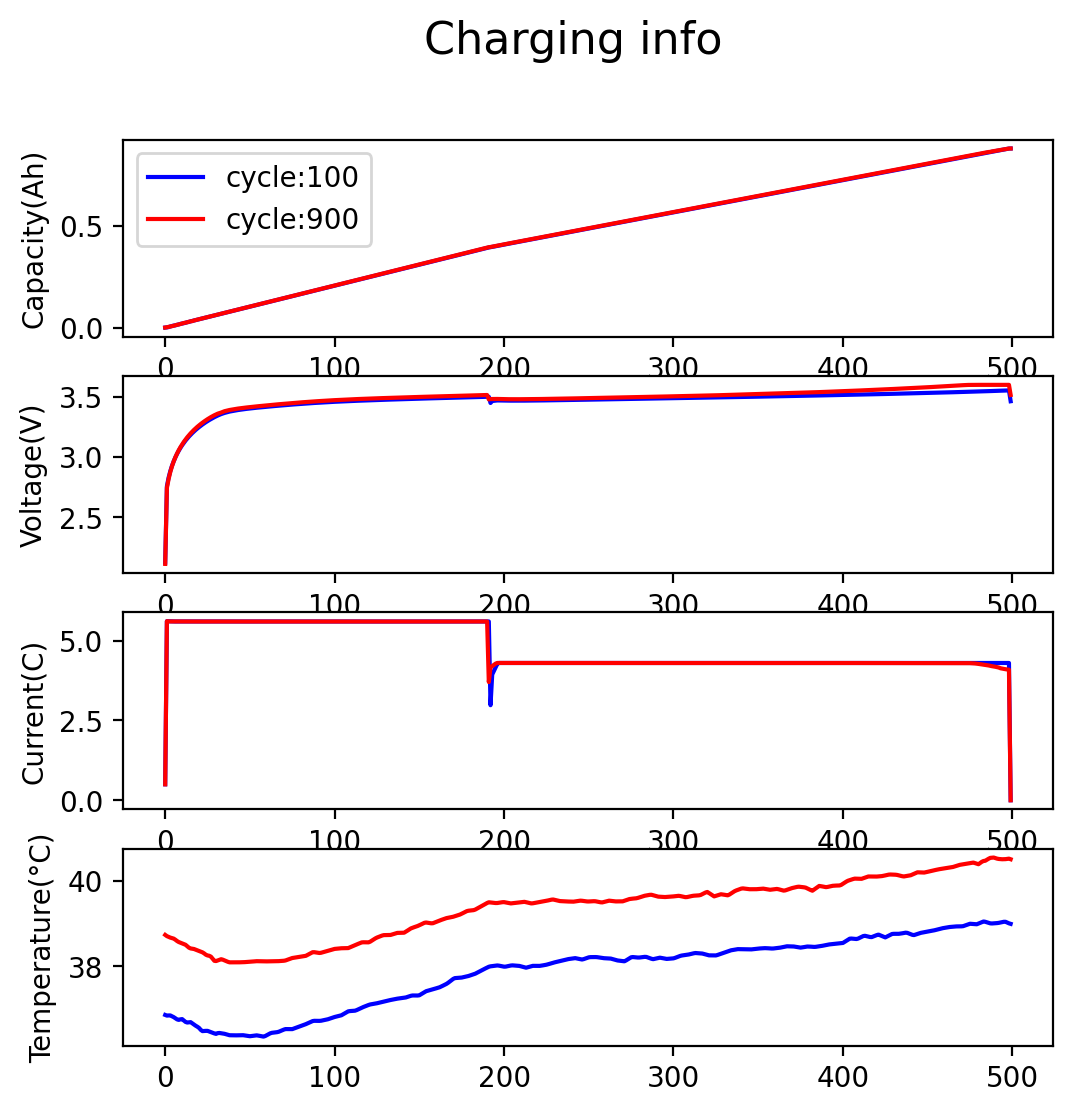

In [3]:
# visualize charging data
cell_number=50
cycle=100

fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(6,6),dpi=200)
for i in range(4):
    if i==0:
        axes[i].plot(charge_data[cell_number][cycle,i],c='b',label='cycle:100')
    else:
        axes[i].plot(charge_data[cell_number][cycle,i],c='b')
cycle=900
for i in range(4):
    if i==0:
        axes[i].plot(charge_data[cell_number][cycle,i],c='r',label='cycle:900')
    else:
        axes[i].plot(charge_data[cell_number][cycle,i],c='r')
axes[0].legend()
axes[0].set_ylabel('Capacity(Ah)')
axes[1].set_ylabel('Voltage(V)')
axes[2].set_ylabel('Current(C)')
axes[3].set_ylabel('Temperature(°C)')

fig.suptitle('Charging info', fontsize=16)

Text(0.5, 0.98, 'Discharging info')

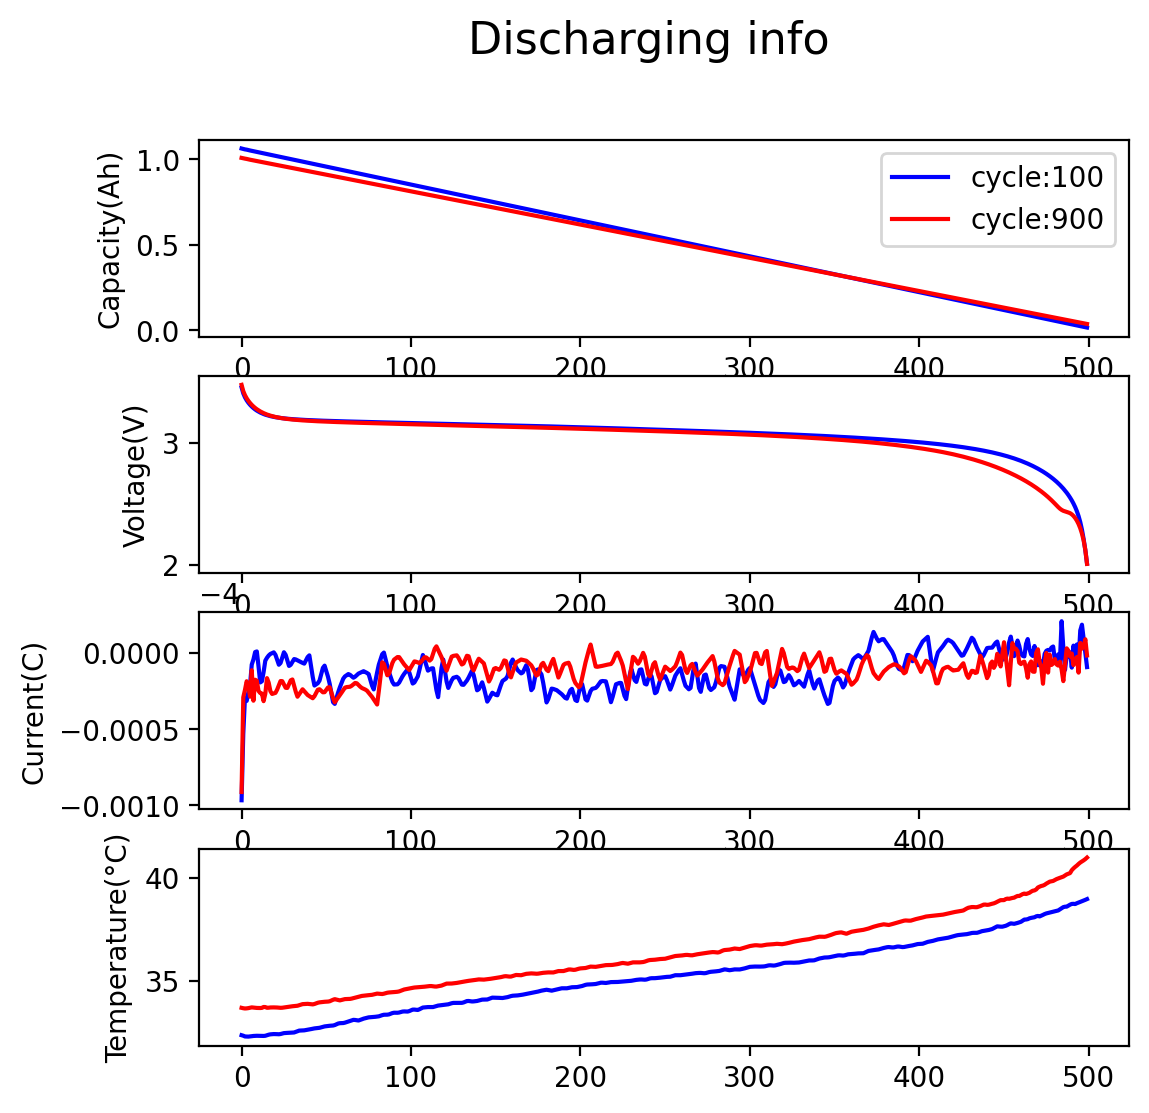

In [4]:
# visualize discharging data
cycle=100
fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(6,6),dpi=200)
for i in range(4):
    if i==0:
        axes[i].plot(discharge_data[cell_number][cycle,i],c='b',label='cycle:100')
    else:
        axes[i].plot(discharge_data[cell_number][cycle,i],c='b')
cycle=900
for i in range(4):
    if i==0:
        axes[i].plot(discharge_data[cell_number][cycle,i],c='r',label='cycle:900')
    else:
        axes[i].plot(discharge_data[cell_number][cycle,i],c='r')
axes[0].legend()
axes[0].set_ylabel('Capacity(Ah)')
axes[1].set_ylabel('Voltage(V)')
axes[2].set_ylabel('Current(C)')
axes[3].set_ylabel('Temperature(°C)')
fig.suptitle('Discharging info', fontsize=16)

Text(0.5, 0.98, 'Summary info')

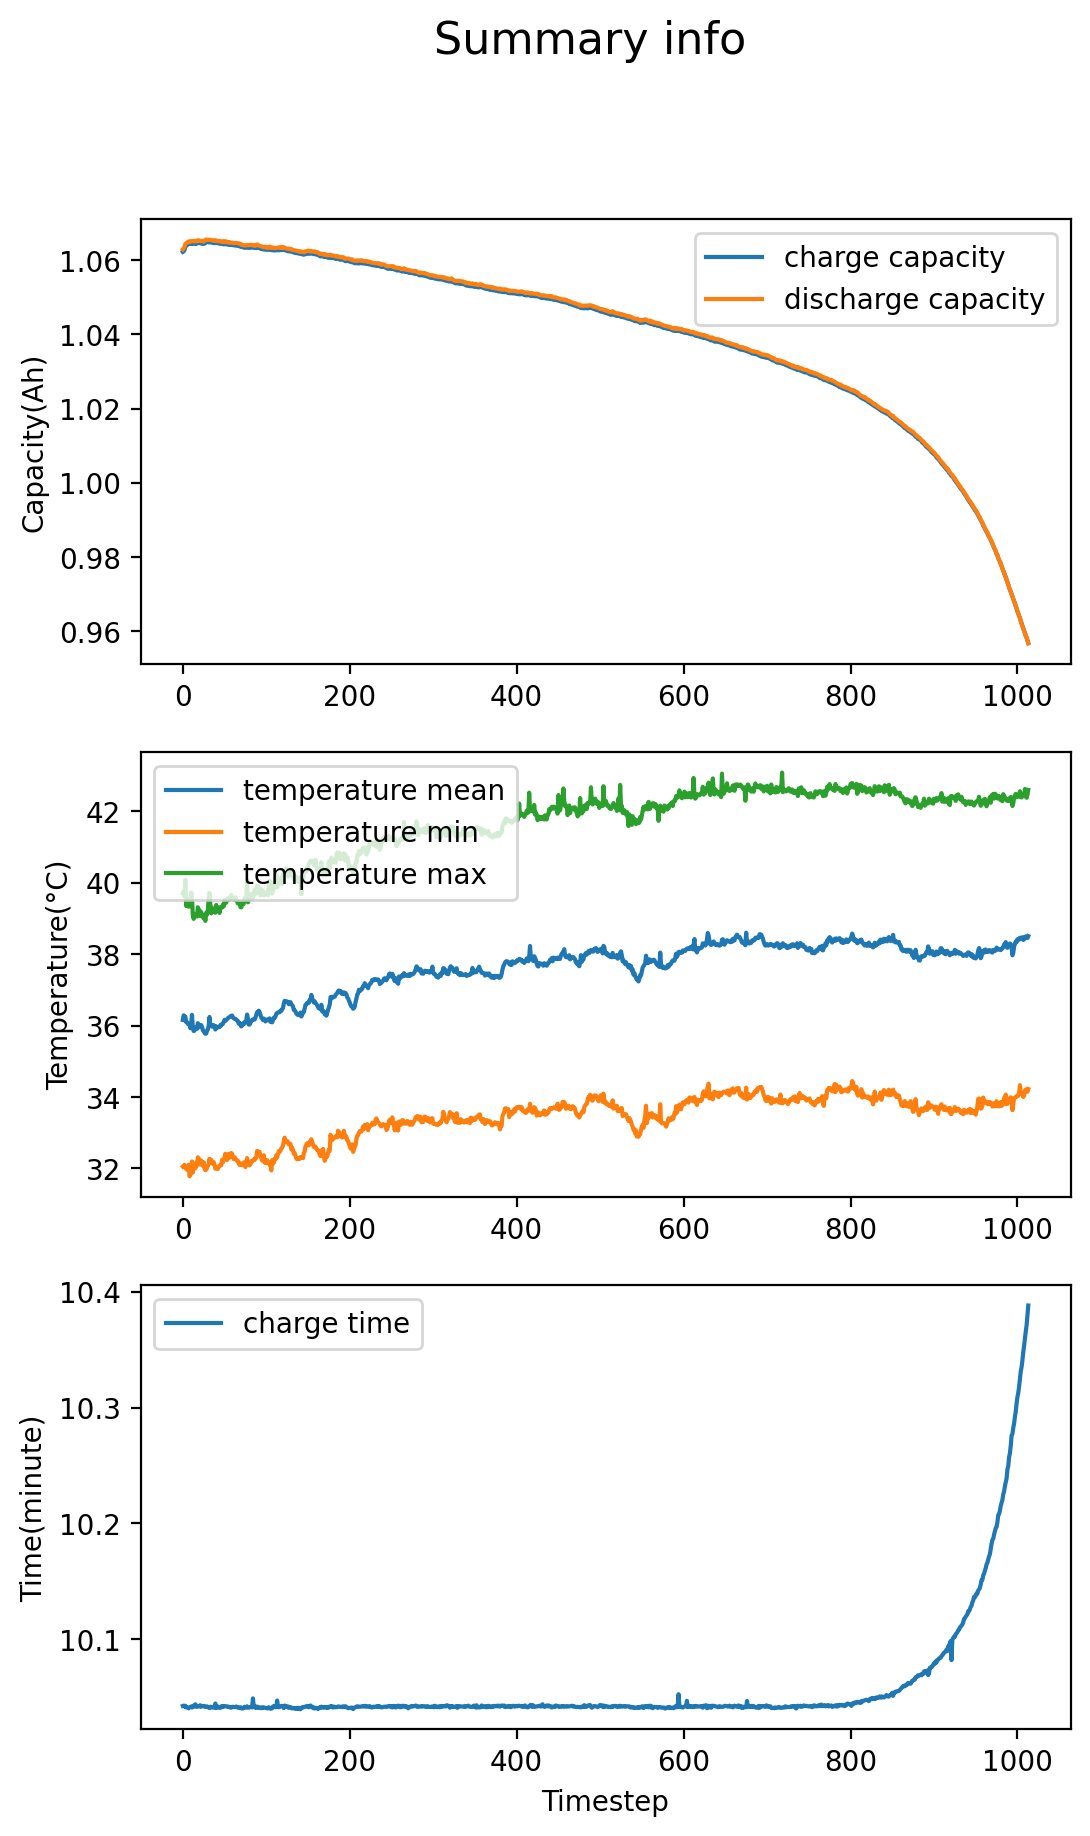

In [5]:
# visualize Summary data 
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(6,10),dpi=200)

axes[0].plot(summary_data[cell_number][:,0],label='charge capacity')
axes[0].plot(summary_data[cell_number][:,1],label='discharge capacity')
axes[0].legend()
axes[1].plot(summary_data[cell_number][:,2],label='temperature mean')
axes[1].plot(summary_data[cell_number][:,3],label='temperature min')
axes[1].plot(summary_data[cell_number][:,4],label='temperature max')
axes[1].legend()
axes[2].plot(summary_data[cell_number][:,5],label='charge time')
axes[2].legend()


axes[0].set_ylabel('Capacity(Ah)')
axes[1].set_ylabel('Temperature(°C)')
axes[2].set_ylabel('Time(minute)')
axes[2].set_xlabel('Timestep')
fig.suptitle('Summary info', fontsize=16)